In [10]:
import numpy as np
import matplotlib.pyplot as plt

from alpub_autoencoder.autoencoder_utils import read_payri_images
from alpub_autoencoder.image_processor_utils import smoothen_image
from alpub_autoencoder.image_processor_utils import apply_adaptive_thresholding
from alpub_autoencoder.image_processor_utils import apply_erosion_dialiation
from alpub_autoencoder.image_processor_utils import remove_disconnected_regions
from alpub_autoencoder.image_processor_utils import apply_otsu_thresholding

from PIL import Image

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
PAPYRI_BASE= '../../Datasets/alpub_v2/papyri_images'

In [13]:
img_list = read_payri_images(PAPYRI_BASE)

D:\MSc - Birmingham\MSc Project\Vesuvius\alpub_autoencoder\autoencoder_utils.py:131: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [14]:
img_list.shape

(6756,)

In [15]:
# Convert the RGB images to grayscale
img_gray = []
for img in img_list:
    image_gray = Image.fromarray(img).convert("L")
    img_gray.append(np.array(image_gray))

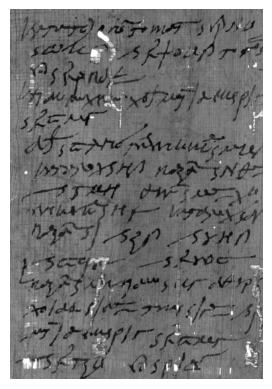

In [92]:
# Load the greyscaled image

image_no = 120
image = img_gray[image_no]

# Display the grayscale image
plt.imshow(image, cmap="gray")
plt.axis("off")
plt.show()

In [93]:
import cv2

In [94]:
# Apply smoothing
image_smooth = smoothen_image(image, kernel_size=3)

In [95]:
# Read the image using cv2
image = image_smooth

# Step 1: Threshold the image to identify the white paths
_, thresholded = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)  # Adjust threshold value as needed

# Step 2: Create a mask of the white paths
mask = np.zeros_like(image)
mask[thresholded == 255] = 1

# Step 3: Obtain the background intensity value
background_intensity = np.mean(image[mask == 0])

# Step 4: Replace white path pixels with the background intensity value
result_image = np.where(mask == 1, background_intensity, image)
result_image = np.uint8(result_image)

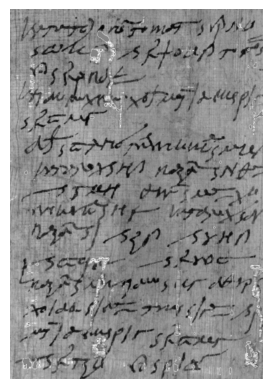

In [96]:
# Display the patched image
plt.imshow(result_image, cmap="gray")
plt.axis("off")
plt.show()

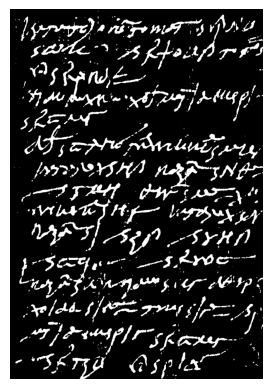

In [97]:
#Apply Otsu's thresholding
otsu_thresholded_image = apply_otsu_thresholding(result_image)

# Display the thresholded image
plt.imshow(otsu_thresholded_image, cmap="gray")
plt.axis("off")
plt.show()